# Editor retention, an approximation

Hello! This code was created by [Silvia Gutiérrez](https://meta.wikimedia.org/wiki/User:SEgt-WMF) with contributions from [Krishna Chaitanya (KC) Velaga](https://meta.wikimedia.org/ wiki/User:KCVelaga_(WMF)) to answer the specific question of a group of volunteers.
They wanted to know, using their Dashboard data, who and how many people kept editing after being trained by them.
Since this has been a common question, it is shared with all of you to continue reflecting on these data :)

Cite this work:
Gutiérrez, Silvia & Krishna Chaitanya Velaga. "Editor retention, an approximation". Wikimedia Foundation. 

License: 
[CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/deed.en)

## Getting the data
Right click on the "Edits' data" link and copy the url

<p float="left">
  <img src="img\step_1.png"  width="30%" height="30%">
  <img src="img\descarga_datos.png"  width="50%" height="50%">
</p>


### 1) Import functions

These "functions" are the code I wrote so that you don't have to write the code, but actually only "activate" it. But, hey, it is open to be modified! These functions live in the "my_functions.py" file. To activate them, just click on the next cell and press ctrl+enter or click on the play button at the top of this page (more info in this [video](https://www.youtube.com/watch?v=2V5Gq_iYqsY).
You'll do the same with all the following cells, and will see this emoji 🤓 before any cell you actually need to change at least one parameter

In [1]:
from datetime import date
from my_functions import decode_df, connect, pd_query, get_wikis, query_wikis, sql_tuple, create_dataframe, generate_query, plot_edits_over_time, generate_timeline_query, plot_indivedits_over_time

### 2) Import your data 🤓
Replace the URL below with your own csv (the one you copied and pasted in the preparation step)

In [2]:
df = create_dataframe("https://outreachdashboard.wmflabs.org/course_edits_csv?course=Biblioteca_Daniel_Cos%C3%ADo_Villegas_ColMex/Editat%C3%B3n_Haciendo_y_deshaciendo_el_g%C3%A9nero")
df.head()

revision_id                 timestamp                      wiki  \
0    106085145 2018-03-08 20:58:25+00:00  https://es.wikipedia.org   
1    106085474 2018-03-08 21:11:52+00:00  https://es.wikipedia.org   
2    106085499 2018-03-08 21:13:01+00:00  https://es.wikipedia.org   
3    106085534 2018-03-08 21:13:56+00:00  https://es.wikipedia.org   
4    106085608 2018-03-08 21:16:04+00:00  https://es.wikipedia.org   

                   article_title  \
0  Rosa María Fernández Esquivel   
1  Rosa María Fernández Esquivel   
2  Rosa María Fernández Esquivel   
3  Rosa María Fernández Esquivel   
4  Rosa María Fernández Esquivel   

                                                diff     username  \
0  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
1  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
2  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
3  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   
4  https://es.wikipedia.org/w/index.php?title=Ros...  Silva Selva   

   bytes_added  references_added  new_article  dashboard_edit  \
0           14               0.0        False           False   
1           -2               0.0        False           False   
2           44               0.0        False           False   
3           30               0.0        False           False   
4           42               0.0        False           False   

        domain_name database_code  
0  es.wikipedia.org        eswiki  
1  es.wikipedia.org        eswiki  
2  es.wikipedia.org        eswiki  
3  es.wikipedia.org        eswiki  
4  es.wikipedia.org        eswiki

### 3) Create the query 🤓
The following code creates the query you need to find out who, from all the users you trained kept editing afterwards. For that, you need to decide on two time-windows 1) How many days before your event they might have registered ("days_before = 60" means they registered within 60 days prior to the event) and 2) how many days after the event you will track their activity, i.e. "days_after=360" means 360 days  (bear in mind you might break the code if you add too many days) 

In [3]:
query = generate_query(df, days_before = 60, days_after = 360) #second number is the number of days before the start of the edition that should be considered
print(query)

I'm looking for edits between 20180308183740 & 20190304005637
I have consider any users who edited in the campaign and created a Wiki-account between 20180107183740 & 20180308183740

    WITH reg_users AS 
        (SELECT
            user_registration,
            user_editcount,
            user_name    
        FROM
            user
        WHERE
            user_name IN ('Silva Selva', 'PetrohsW', 'Fagoaga', 'Ninonllano', 'Danfermat2014', 'Clemenflays', 'Clauroinfante', 'Cutzin', 'Ikiwiki1984', 'Edo21c', 'ClaudiaOcA', 'Lizperez.c', 'Vjcid', 'Marisol Frías', 'Taniastronauta', 'Plathando', 'Xochipiltecatl', 'Mromandl', 'Rurudesu', 'Cliografo', 'Torres mejia', 'Diaz campos', 'Radugako', 'Nenenki', 'Valentín Or', 'MonSH', 'Marianacordoban', 'Sarcle', 'Akatoxkatl', 'Tbocanegra', 'Antropfem') AND
            user_registration BETWEEN 20180107183740 AND 20180308183740),
        revision AS (
            SELECT
            COUNT(rev_id),
            actor_name
            FROM
            r

### 4) Review which wikis received training and decide which one to examine

In [4]:
wikis = get_wikis(df)
print(wikis)

['eswiki', 'wikidatawiki']


### 5) Change "eswiki" with code of the wiki you are interested in examining 🤓

In [5]:
edits_user_and_project = query_wikis(query, df, selected_wiki = "eswiki")

I'm done with eswiki


### 6) Check your results
If there were people who a) joined in the time frame you defined and b) continued editing in the time frame you also defined, they will appear below, if not, it means that nobody meets these two conditions

In [6]:
edits_user_and_project

COUNT(rev_id)       actor_name wiki_db
0              1    Clauroinfante  eswiki
1             19           Cutzin  eswiki
2              6    Danfermat2014  eswiki
3              6  Marianacordoban  eswiki
4             20          Nenenki  eswiki
5              8       Ninonllano  eswiki
6              3         Rurudesu  eswiki
7             13            Vjcid  eswiki
8              1   Xochipiltecatl  eswiki

### 7) Start the analysis!
The following block of code will show you the editors in order of activity, that is, by the number of edits they continued to make on the Wiki you selected in step 5.

In [7]:
# Count the total number of edits per 'actor_name'
sum_counts = edits_user_and_project.groupby('actor_name')['COUNT(rev_id)'].sum().reset_index()
sorted_counts = sum_counts.sort_values(by='COUNT(rev_id)', ascending=False)
sorted_counts

actor_name  COUNT(rev_id)
4          Nenenki             20
1           Cutzin             19
7            Vjcid             13
5       Ninonllano              8
2    Danfermat2014              6
3  Marianacordoban              6
6         Rurudesu              3
0    Clauroinfante              1
8   Xochipiltecatl              1

### 8) Get edits over time 🤓
The following code creates the query you need to find out the timeline of the edits of your retained editors, bear in mind you have to (again) select the time-window of the how many days before your event they might have registered ("days_before = 60" means they registered within 60 days prior to the event) and how many days after the event are you wishing to track with "days_after" (bear in mind you might break the code if you add too many days) 

In [8]:
query_time = generate_timeline_query(df, days_before = 60, days_after = 300)
print(query_time)

The registration date I used was between 20180107183740 & 2018-03-08 18:37:40+00:00

    WITH reg_users AS 
        (SELECT
            user_registration,
            user_editcount,
            user_name    
        FROM
            user
        WHERE
            user_name IN ('Silva Selva', 'PetrohsW', 'Fagoaga', 'Ninonllano', 'Danfermat2014', 'Clemenflays', 'Clauroinfante', 'Cutzin', 'Ikiwiki1984', 'Edo21c', 'ClaudiaOcA', 'Lizperez.c', 'Vjcid', 'Marisol Frías', 'Taniastronauta', 'Plathando', 'Xochipiltecatl', 'Mromandl', 'Rurudesu', 'Cliografo', 'Torres mejia', 'Diaz campos', 'Radugako', 'Nenenki', 'Valentín Or', 'MonSH', 'Marianacordoban', 'Sarcle', 'Akatoxkatl', 'Tbocanegra', 'Antropfem') AND
            DATE(user_registration) BETWEEN 20180107183740 AND 20180308183740),
        revision AS (
            SELECT
            rev_id,
            rev_timestamp,
            actor_name
            FROM
            revision
            JOIN actor ON rev_actor = actor_id
            JOIN 

### 9) Run the query
If everything went well you'll see a dataframe with the follwing column names: rev_id, rev_timestamp (the date of the edit), actor_name (the user name), and wiki_db (the wiki in which they did the edit).

In [9]:
result = query_wikis(query_time, df, selected_wiki = "eswiki")
result.head()

I'm done with eswiki


rev_id   rev_timestamp actor_name wiki_db
0  106090804  20180309012309    Nenenki  eswiki
1  106090928  20180309013034    Nenenki  eswiki
2  106090932  20180309013059    Nenenki  eswiki
3  106091590  20180309020503    Nenenki  eswiki
4  106091741  20180309021243    Nenenki  eswiki

### 10) Plot your results! 🤓
#### 10.1) Retained editors' edits in time 🤓
This will show a graph of the all your retained users edits in time, it will only show the dates of edits that are above the threshold you select in "edit_counts_threshold". You can also change the font-size of those dates, i.e. "fontsize = 8" establishes that the font is size eight :)

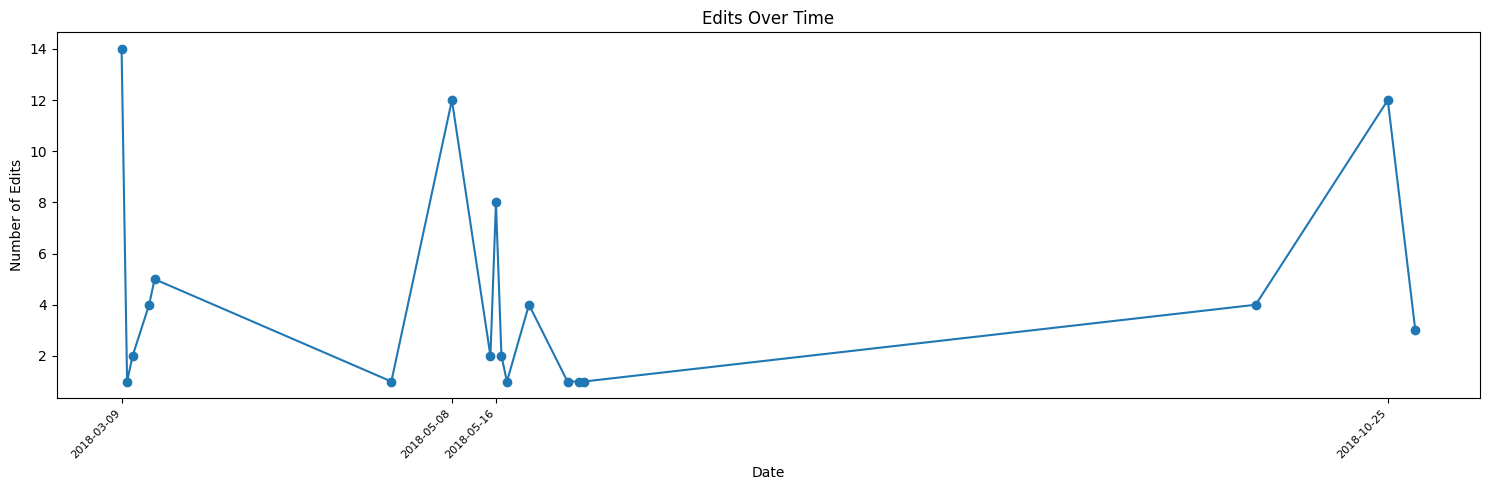

In [10]:
plot_edits_over_time(result, edit_counts_threshold = 5, fontsize = 8)

#### 10.1) Retained editors' individual edits in time 🤓
This is quite similar to the last graph, but it will include editors that have made more edits according to the threshold that you define (edit_counts_threshold = 3, means that we will see only editors that have made more than three edits).
Similarly, dates will only show of days in which there are more editions than those defined in the "daily_edits_threshold"

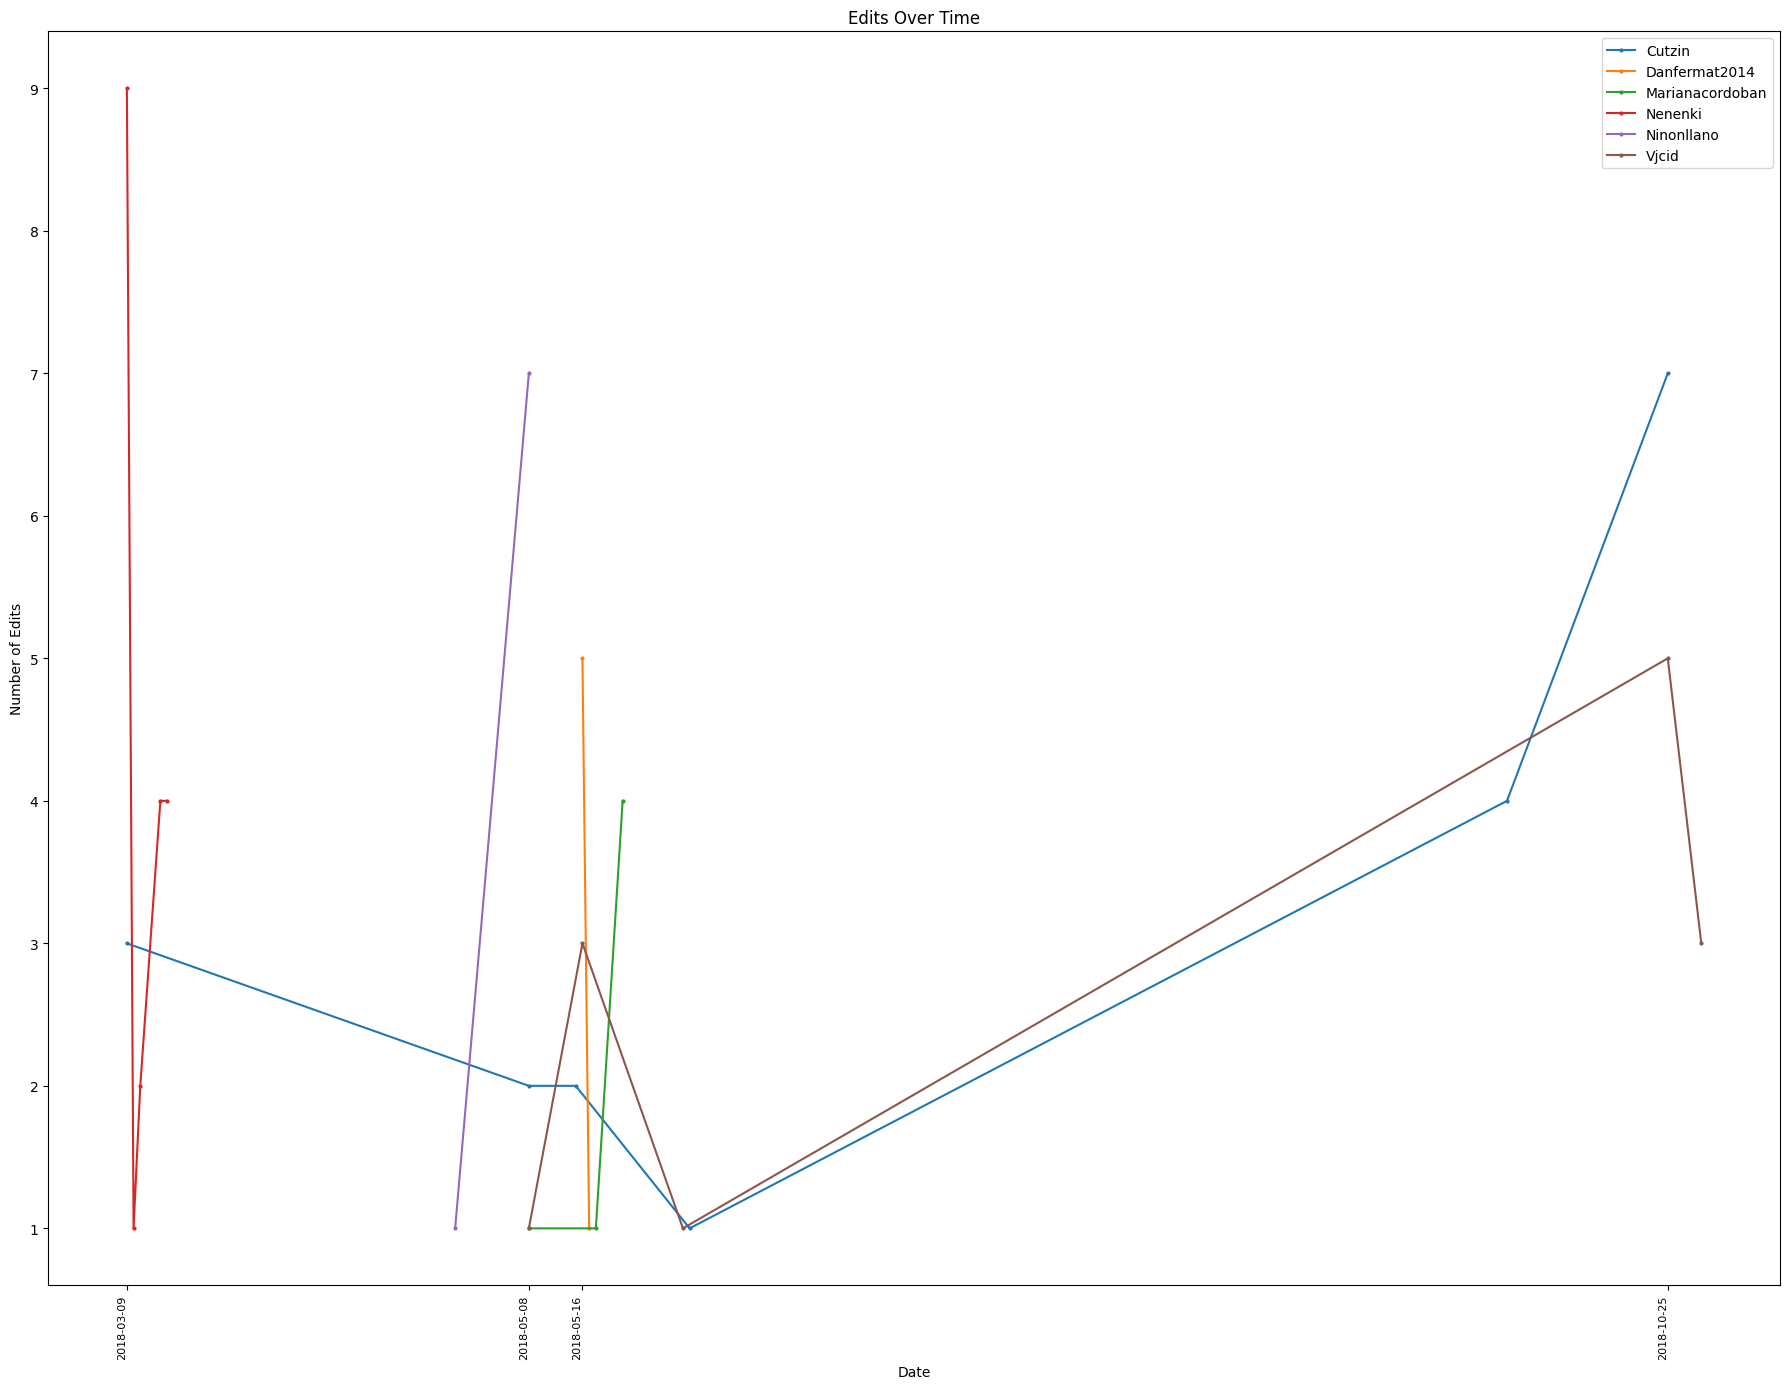

<Figure size 640x480 with 0 Axes>

In [11]:
plot_indivedits_over_time(result, edit_counts_threshold = 3, daily_edits_threshold = 1)

### Optional: Export your results to a csv
If you want to see the data we just gathered in a csv (which you can open in the spreadsheet editor of your preference), run the follwing line:

In [12]:
result.to_csv('data/result_set_timestamp.csv')